In [1]:
import os
import numpy as np
import cv2

from tensorflow.keras.models import load_model
from PIL import Image
from matplotlib import pyplot as plt

/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
model = load_model(os.path.expanduser('~/Desktop/xray_cnn.h5'))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,388,582 (257.07 MB)

 Trainable params: 67,386,404 (257.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

 Optimizer params: 2 (12.00 B)

In [3]:
SIZE = 256

image_test = cv2.imread('archive/test/TURBERCULOSIS/Tuberculosis-660.png')
image_test = Image.fromarray(image_test, 'RGB')
image_test = image_test.resize((SIZE, SIZE))
image_test = np.array(image_test)

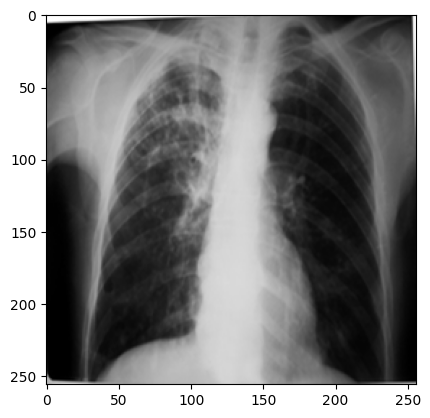

In [4]:
plt.imshow(image_test)

In [5]:
prediction = model.predict(np.expand_dims(image_test, 0))
prediction = np.squeeze(prediction) #remove the wrapping; from (1,10) to (10)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


array([0., 0., 0., 1.], dtype=float32)

In [6]:
if np.argmax(prediction) == 0:
    print("You might have COVID19")
    print("Confidence: ", prediction[np.argmax(prediction)])
if np.argmax(prediction) == 1:
    print("You have NORMAL lungs")
    print("Confidence: ", prediction[np.argmax(prediction)])
if np.argmax(prediction) == 2:
    print("You might have PNEUMONIA")
    print("Confidence: ", prediction[np.argmax(prediction)])
if np.argmax(prediction) == 3:
    print("You might have TUBERCULOSIS")
    print("Confidence: ", prediction[np.argmax(prediction)])

You might have TUBERCULOSIS
Confidence:  1.0
